In [ ]:
# Importing necessary libraries from Keras
from keras.utils import to_categorical
from keras.models import model_from_json
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D



ye vala part ko Gpu se train karna hai

In [ ]:
# Importing additional libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enabling inline plotting for Jupyter Notebooks
%matplotlib inline

In [2]:
#Define directories for training and testing images
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    # Initializing lists to store image paths and labels
    image_paths = []
    labels = []
    
    # Iterating through each label directory
    for label in os.listdir(dir):
        # Iterating through each image in the label directory
        for imagename in os.listdir(os.path.join(dir,label)):
            # Appending the image path and corresponding label
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        # Printing progress for each label
        print(label, "completed")
    
    # Returning the lists of image paths and labels
    return image_paths, labels

In [4]:
# Creating an empty DataFrame
train = pd.DataFrame()

# Filing the DataFrame with image paths and labels using the createdataframe function
train['image'], train['label'] = createdataframe(TRAIN_DIR)


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [1]:
# Creating an empty DataFrame
test = pd.DataFrame()
# Filing the DataFrame with image paths and labels using the createdataframe function
test['image'], test['label'] = createdataframe(TEST_DIR)

NameError: name 'pd' is not defined

In [7]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [8]:

# Importing the tqdm library's notebook version
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    # Initializing an empty list to store features
    features = []
    # Looping through each image filename in the list, displaying a progress bar
    for image in tqdm(images):
        # Loading the image in grayscale
        img = load_img(image, grayscale=True)
        # Converting the image to a numpy array
        img = np.array(img)
        # Appending the image array to the features list
        features.append(img)
    
    # Converting the list of image arrays to a numpy array
    features = np.array(features)
    # Reshapeing the array to have dimensions (number of images, height, width, channels)
    features = features.reshape(len(features), 48, 48, 1)
    # Returning the extracted features
    return features


In [10]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\gaura\anaconda3\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [12]:
# Divide the pixel values of the training features by 255.0 to scale them between 0 and 1
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder


In [14]:
# Initializing a LabelEncoder object
le = LabelEncoder()
# Fit the LabelEncodeing to the labels in the 'label' column of the 'train' dataframe
le.fit(train['label'])


LabelEncoder()

In [15]:
# Transforming the categorical labels in the 'label' column of the training data using the fitted LabelEncoder
y_train = le.transform(train['label'])
# Transforming the categorical labels in the 'label' column of the test data using the fitted LabelEncoder
y_test = le.transform(test['label'])


In [16]:
# Converting the numerical labels for training data into one-hot encoded vectors with 7 classes
y_train = to_categorical(y_train, num_classes=7)
# Converting the numerical labels for test data into one-hot encoded vectors with 7 classes
y_test = to_categorical(y_test, num_classes=7)


In [17]:
# Initializing a sequential model
model = Sequential()

# Convolutional layers
# Adding a convolutional layer with 128 filters, each with a 3x3 kernel size, ReLU activation function, and input shape of (48, 48, 1)
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
# Adding a max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Adding a dropout layer with a dropout rate of 0.4
model.add(Dropout(0.4))

# Repeating the above pattern with different parameters for additional convolutional layers
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Fully connected layers
# Adding a dense layer with 512 neurons and ReLU activation function
model.add(Dense(512, activation='relu'))
# Adding a dropout layer with a dropout rate of 0.4
model.add(Dropout(0.4))
# Adding a dense layer with 256 neurons and ReLU activation function
model.add(Dense(256, activation='relu'))
# Adding a dropout layer with a dropout rate of 0.3
model.add(Dropout(0.3))

# Output layer
# Adding a dense layer with 7 neurons (since there are 7 classes) and softmax activation function
model.add(Dense(7, activation='softmax'))


In [18]:
# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


 model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

In [ ]:
# Training the model using the training data (x_train, y_train)
# Validating the model using the validation data (x_test, y_test)
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
163/226 [====================>.........] - ETA: 1:34 - loss: 1.5314 - accuracy: 0.4050

yaha tak apna model train karne ka code hai aur iske baad prediction ka 

abhi prediction ke liye pahale ka model use kar raha hu 

abhi jo model use kar raha hu uski acurracy 62 percent hai


In [27]:
# Converting the model architecture to JSON format
model_json = model.to_json()
# Writing the JSON model architecture to a file
with open("emotiondetectorME228.json", 'w') as json_file:
    json_file.write(model_json)
# Saving the model weights to an HDF5 file
model.save("emotiondetectorME228.h5")


C:\Users\gaura\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
from keras.models import model_from_json

In [29]:
# Loading the model architecture from JSON file
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()

# Reconstructing the model from the loaded JSON
model = model_from_json(model_json)

# Loading model weights
model.load_weights('facialemotionmodel.h5')


In [30]:
label=['angry','disgust','fear','happy','neutral','sad','surprise']

In [31]:
# Defining function to preprocess of a single image
def ef(image):
    img = load_img(image, grayscale=True)
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)  # Reshaping in place
    return feature / 255.0

Original image is angry
1/1 [==============================] - 0s 271ms/step
Model prediction is angry


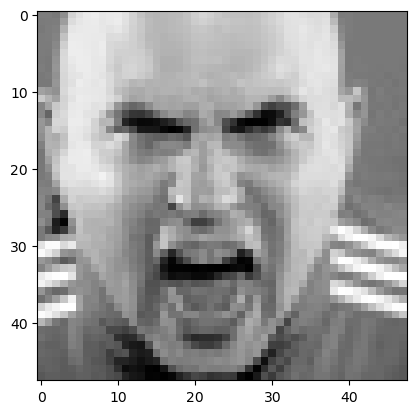

In [32]:
# Loading image, predicting, and displaying the image
image_path = 'images/train/angry/22.jpg'
print("Original image is angry")
img = ef(image_path)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.show()

Original image is sad
1/1 [==============================] - 0s 33ms/step
Model prediction is neutral


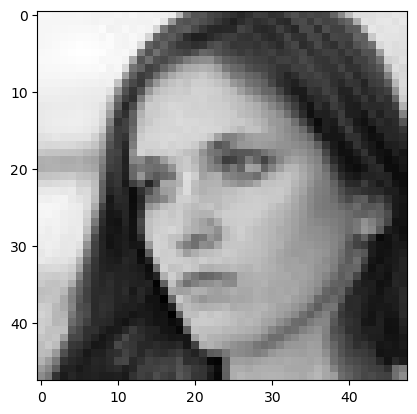

In [33]:
# Load image, predict, and display
image_path = 'images/train/sad/266.jpg'
print("Original image is sad")
img = ef(image_path)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.show()

Original image is sad
1/1 [==============================] - 0s 40ms/step
Model prediction is sad


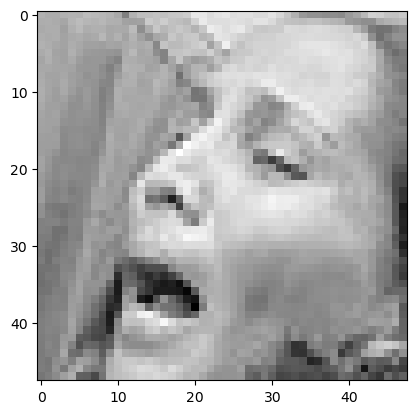

In [34]:
# Load image, predict, and display
image_path = 'images/train/sad/385.jpg'
print("Original image is sad")
img = ef(image_path)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.show()

yaha real time sumulation ka code hai

In [6]:
# Importing necessary libraries for realtime prediction
import cv2
from keras.models import model_from_json
import numpy as np
from tensorflow import keras
model = keras.models.load_model("emotion-detection.h5")
# Loading Haar cascade for face detection
haar_file = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

# Defining a function to extract features from an image
def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

# Open webcam
webcam = cv2.VideoCapture(0)

# Defining dictionary for mapping numerical labels to emotions
labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

# Continuous looping for capturing and processing webcam frames
while True:
    # Reading frame from webcam
    i, im = webcam.read()
    # Converting frame to grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    # Detecting faces in the grayscale frame
    faces = face_cascade.detectMultiScale(im, 1.3, 5)
    try: 
        # Iterating over detected faces
        for (p, q, r, s) in faces:
            # Croping face region from the grayscale frame
            image = gray[q:q+s, p:p+r]
            # Drawing rectangle around the detected face
            cv2.rectangle(im, (p, q), (p+r, q+s), (255, 0, 0), 2)
            # Resize the cropped face region to match model input size
            image = cv2.resize(image, (48, 48))
            # Extracting features from the resized face image
            img = extract_features(image)
            # Making prediction using the loaded model
            pred = model.predict(img)
            # Getting the predicted emotion label
            prediction_label = labels[pred.argmax()]
            # Displaying the predicted emotion label on the frame
            cv2.putText(im, '%s' %(prediction_label), (p-10, q-10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 0, 255))
        # Displaying the frame with predicted emotion labels
        cv2.imshow("Output", im)
        # Waitting for key press and close the window if 'Esc' key is pressed
        cv2.waitKey(27)
    except cv2.error:
        pass  # Skip processing if an error occurs (e.g., no face detected)


ModuleNotFoundError: No module named 'cv2'

In [3]:
!pip install opencv-python
!pip install opencv-python-headless

     ---------------------------------------- 38.6/38.6 MB 9.9 MB/s eta 0:00:00
     --------------------------------------- 15.8/15.8 MB 10.9 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\daksh\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 38.5/38.5 MB 9.6 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\daksh\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
!pip install opencv-python

You should consider upgrading via the 'C:\Users\daksh\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
